In [3]:
import ee
ee.Initialize()

We are going to look at four different satellites.

COPERNICUS/S2: SENTINEL 2:   2 satellites (Sentinel 2A (from June 2015) and 2B(from March 2017)) 180 degrees apart in same orbit.  10-day revisit cycle for each one.

LANDSAT/LC08/C01/T1_SR:  LANDSAT 8: (from Feb 2013)

LANDSAT/LT05/C01/T1_SR:  LANDSAT 5: (from 1984)

LANDSAT/LT04/C01/T1_SR:  LANDSAT 4 (from 1982-93):


In [5]:
coords = [27.95,11.57]
geom = ee.Geometry.Point(coords)

In [58]:
def get_datetimes(collection_name, property_name, coords):
    geom = ee.Geometry.Point(coords)
    image_coll = ee.ImageCollection(collection_name).filterBounds(geom)
    def accumulate_timestamps(image, timestamps):
        ts = image.get('system:time_start')
        new_list = ee.List(timestamps)
        return ee.List(new_list.add(ts))
    ts_list = dataset.iterate(accumulate_timestamps, ee.List([]))
    return ts_list.getInfo()

In [59]:
sentinel2 = get_datetimes("COPERNICUS/S2","system:time_start", coords)

In [75]:
import numpy as np
sentinel2.sort()
sentinel2_diffs = [int((sentinel2[i] - sentinel2[i-1])/1000) for i in range(1,len(sentinel2))]
sentinel2_log_diffs = [np.log(tsdiff) for tsdiff in sentinel2_diffs if tsdiff > 0]

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

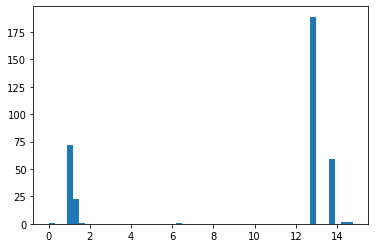

In [89]:
ax = plt.hist(sentinel2_log_diffs, bins=50)
plt.xlabel = "log(time (s) between images)"
plt.show()